## Import modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, recall_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier, Pool

# set custom pd settings
pd.set_option('display.max_columns', None)

## Import train and test sets

In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [3]:
X_train.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,29,0.733,0.921,0.875,0.914,0.509,0.868,0.801,0.996,59,30,0.629,0.678,0.686,82,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,30,0.895,0.581,0.778,0.776,0.514,0.792,0.715,0.914,44,14,0.678,0.999,0.737,181,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,58,0.814,0.740,0.843,0.963,0.646,0.789,0.562,0.904,29,-29,0.683,0.384,0.436,159,7,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,63,0.756,0.755,0.776,0.789,0.561,0.569,0.892,0.822,25,-38,0.871,0.786,0.771,178,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,63,0.821,0.640,0.680,0.771,0.830,0.838,0.740,0.659,31,-32,0.762,0.494,0.799,164,4,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [4]:
X_test.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,52,0.552,0.897,0.867,0.998,0.877,0.771,0.712,0.649,38,-14,0.747,0.728,0.985,181,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
1,24,0.803,0.910,0.604,0.804,0.735,0.626,0.844,0.693,59,35,0.629,0.678,0.686,185,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1
2,37,0.846,0.838,0.721,0.610,0.999,0.736,0.840,0.898,62,25,0.590,0.745,0.667,139,2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1
3,36,0.828,0.663,0.986,0.834,0.761,0.639,0.615,0.623,38,2,0.747,0.728,0.985,196,4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
4,41,0.753,0.864,0.870,0.450,0.791,0.542,0.948,0.854,25,-16,0.871,0.786,0.771,208,3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


In [5]:
# define a function to plot the auc curve for a model
def plot_auc_curve(clf, title):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = clf.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)

    # plot
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Baseline LogReg Model (Before Preprocessing)

In [6]:
baseline = LogisticRegression(solver = 'liblinear', max_iter = 500)

# fit model
baseline.fit(X_train, y_train.values.ravel())

# predict 
y_pred_test = baseline.predict(X_test)


In [7]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, baseline.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9997973082536079
Area Under Curve: 0.9328818067550582
Confusion Matrix: 
[[123315      0]
 [    25      0]]
Recall score: 0.0


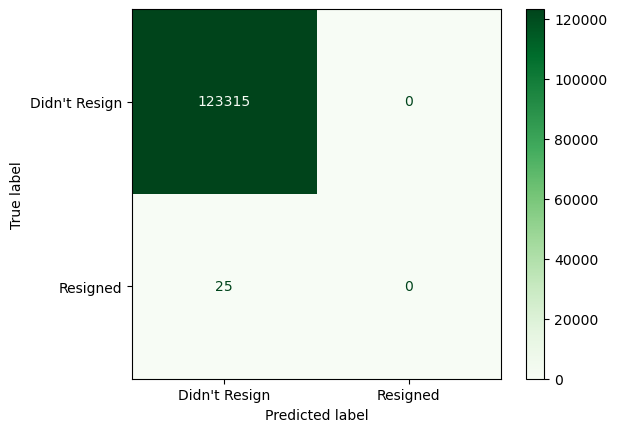

In [8]:
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

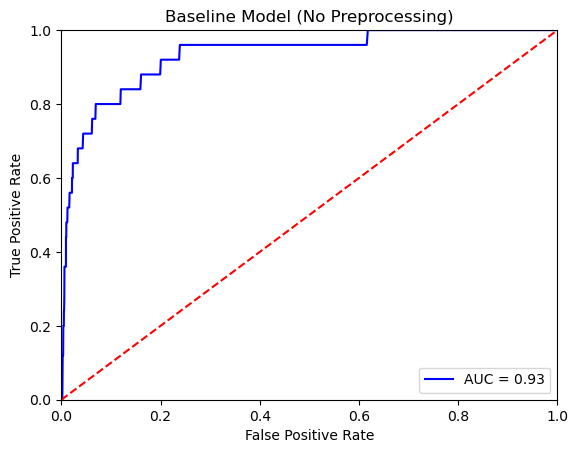

In [9]:
plot_auc_curve(baseline, title="Baseline Model (No Preprocessing)")

There were no accurately predicted positive classes.

## Preprocessing: Random Oversampling of Minority Class (test set only)

In [10]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy="minority")

# oversample train splits using imbalanced-learn
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

In [11]:
# Count of oversampled y-training set
print("Oversampled y_train set")
print(y_train_over['Resigned'].value_counts())

# Count of original y_training set
print("Original y-train set")
print(y_train['Resigned'].value_counts())

Oversampled y_train set
0    287742
1    287742
Name: Resigned, dtype: int64
Original y-train set
0    287742
1        51
Name: Resigned, dtype: int64


# LogReg Model After Oversampling

In [12]:
# instantiate model
lr_over = LogisticRegression(solver = 'liblinear', max_iter = 500)

# fit and predict 
lr_over.fit(X_train_over, y_train_over.values.ravel())

# Predict test values
y_pred_test = lr_over.predict(X_test)

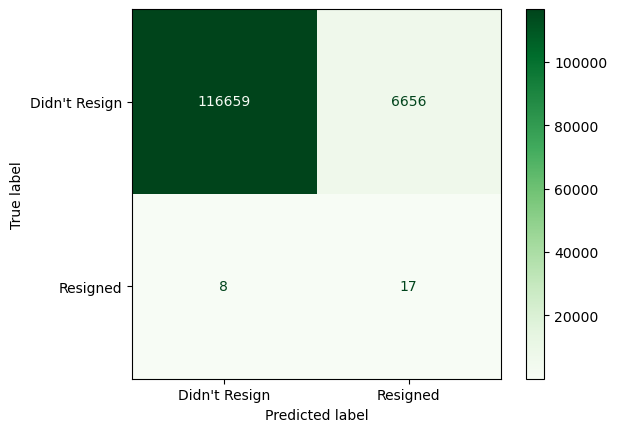

In [13]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

In [14]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, lr_over.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9459704880817253
Area Under Curve: 0.8998584113854762
Confusion Matrix: 
[[116659   6656]
 [     8     17]]
Recall score: 0.68


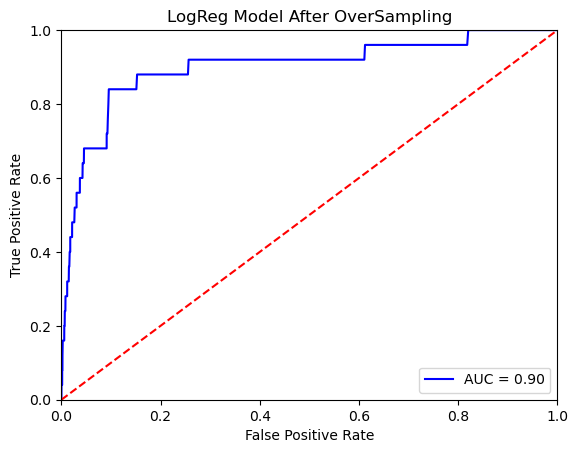

In [15]:
# plot LogReg model with oversampling only
plot_auc_curve(lr_over, title="LogReg Model After OverSampling")

In [81]:
# get feature coefficients
feature_importances = pd.DataFrame(lr_over.coef_[0], lr_over.feature_names_in_).reset_index()
feature_importances.rename(columns={"index":"features", 0:"coefficients"}, inplace=True)
feature_importances_top_5 = feature_importances.sort_values('coefficients', ascending=False)[:5]
feature_importances_top_5

,features,coefficients
29,sub_team_Team 17,9.627789
44,sub_team_Team 9,9.248124
12,sup_perceptiveness_h,8.042391
24,sub_team_Team 12,7.066935
38,sub_team_Team 3,4.691458


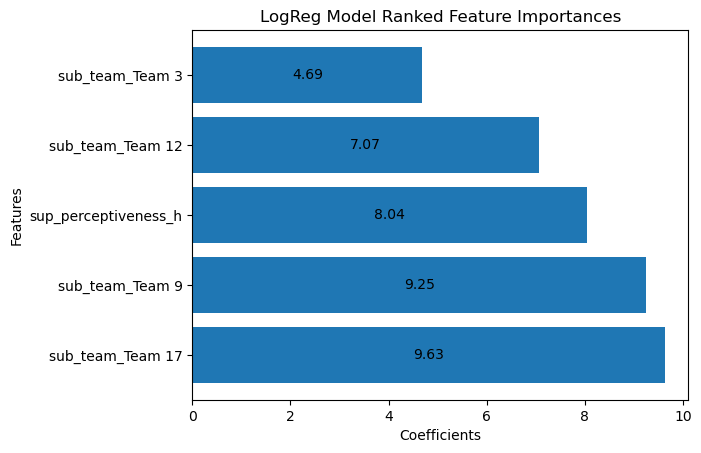

In [111]:
# plot feature importance for top 5
bar = plt.barh(width='coefficients', y='features', data=feature_importances_top_5)
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.title("LogReg Model Ranked Feature Importances")
plt.bar_label(bar, fmt='%.2f', label_type="center")
plt.show()

Interestingly, the top 3 features in order for the logistic regression model are `sub_team_Team_17`, `sub_team_Team_9` and `sup_perceptiveness_h`. This means that you are most likely to voluntarily resign if you are on Team 17 or Team 9, and likely if your supervisor has a low perceptiveness score.

## Preprocessing: Scale Numeric Features 

In [16]:
# Get numeric features
num_features = X_train.select_dtypes(include=['number'], exclude=['datetime']).columns.to_list()
num_features = num_features[:16]

In [17]:
# copy dataframes for scaling only
X_train_scale_copy = X_train.copy()
X_test_scale_copy = X_test.copy()


#instantiate scaler
scaler = StandardScaler()

# fit data
scaler.fit(X_train_scale_copy[num_features])

# transform data
X_train_scale_copy[num_features] = scaler.transform(X_train_scale_copy[num_features])
X_test_scale_copy[num_features] = scaler.transform(X_test_scale_copy[num_features])

# Check mean and std
print(X_train_scale_copy[num_features].mean())
print(X_train_scale_copy[num_features].std())

sub_age                      -5.158843e-17
sub_health_h                 -1.599809e-15
sub_commitment_h              9.872538e-16
sub_perceptiveness_h          1.505484e-15
sub_dexterity_h               7.642100e-16
sub_sociality_h               5.696331e-16
sub_goodness_h                2.436841e-15
sub_strength_h                2.915691e-16
sub_openmindedness_h          4.422421e-16
sup_age                       1.217186e-16
sup_sub_age_diff             -1.681655e-17
sup_commitment_h              1.282958e-15
sup_perceptiveness_h          7.142387e-16
sup_goodness_h                1.002870e-15
Num Underrecorded Efficacy   -1.654188e-17
Num Mismatched Events        -4.948984e-17
dtype: float64
sub_age                       1.000002
sub_health_h                  1.000002
sub_commitment_h              1.000002
sub_perceptiveness_h          1.000002
sub_dexterity_h               1.000002
sub_sociality_h               1.000002
sub_goodness_h                1.000002
sub_strength_h          

In [18]:
X_train_scale_copy.head()

,sub_age,sub_health_h,sub_commitment_h,sub_perceptiveness_h,sub_dexterity_h,sub_sociality_h,sub_goodness_h,sub_strength_h,sub_openmindedness_h,sup_age,sup_sub_age_diff,sup_commitment_h,sup_perceptiveness_h,sup_goodness_h,Num Underrecorded Efficacy,Num Mismatched Events,sub_sex_F,sub_sex_M,sub_shift_Shift 1,sub_shift_Shift 2,sub_shift_Shift 3,sub_team_Team 1,sub_team_Team 10,sub_team_Team 11,sub_team_Team 12,sub_team_Team 13,sub_team_Team 14,sub_team_Team 15,sub_team_Team 16,sub_team_Team 17,sub_team_Team 18,sub_team_Team 19,sub_team_Team 2,sub_team_Team 20,sub_team_Team 21,sub_team_Team 22,sub_team_Team 23,sub_team_Team 24,sub_team_Team 3,sub_team_Team 4,sub_team_Team 5,sub_team_Team 6,sub_team_Team 7,sub_team_Team 8,sub_team_Team 9,sub_team_unassigned,sub_role_Laborer,sub_role_Shift Manager,sub_role_Team Leader,sub_workstyle_h_Group A,sub_workstyle_h_Group B,sub_workstyle_h_Group C,sub_workstyle_h_Group D,sub_workstyle_h_Group E,sup_sex_F,sup_sex_M,sup_role_Shift Manager,sup_role_Team Leader
0,-0.900781,-0.087194,1.146760,0.834403,1.151287,-1.413995,0.885453,0.395302,1.505759,1.358019,1.625400,-0.870393,-0.297973,-0.145016,-2.039435,-1.705561,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
1,-0.828039,0.966553,-1.154434,0.222726,0.227194,-1.383216,0.367993,-0.126152,0.987714,0.292686,0.799915,-0.519407,1.529973,0.170625,0.426173,-0.961556,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
2,1.208713,0.439679,-0.078287,0.632612,1.479408,-0.570658,0.347567,-1.053855,0.924538,-0.772648,-1.418573,-0.483592,-1.972167,-1.692276,-0.121740,0.526455,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,1.572419,0.062412,0.023236,0.210114,0.314246,-1.093896,-1.150344,0.947073,0.406494,-1.056736,-1.882908,0.863049,0.317037,0.381053,0.351457,0.154452,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
4,1.572419,0.485211,-0.755109,-0.395256,0.193712,0.561998,0.681192,0.025433,-0.623278,-0.630603,-1.573351,0.082284,-1.345768,0.554346,0.002785,-0.589553,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1


# Logreg Model After Scaling Only 

In [19]:
# instantiate model
lr_scaled = LogisticRegression(solver = 'liblinear', max_iter = 500)

# fit and predict 
lr_scaled.fit(X_train_scale_copy, y_train.values.ravel())

# Predict test values
y_pred_test = lr_scaled.predict(X_test)

#### Results

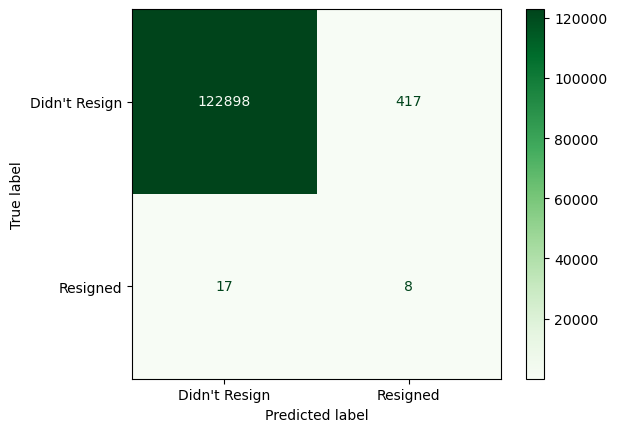

In [20]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

In [21]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, lr_scaled.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9964812712826334
Area Under Curve: 0.9257936179702387
Confusion Matrix: 
[[122898    417]
 [    17      8]]
Recall score: 0.32


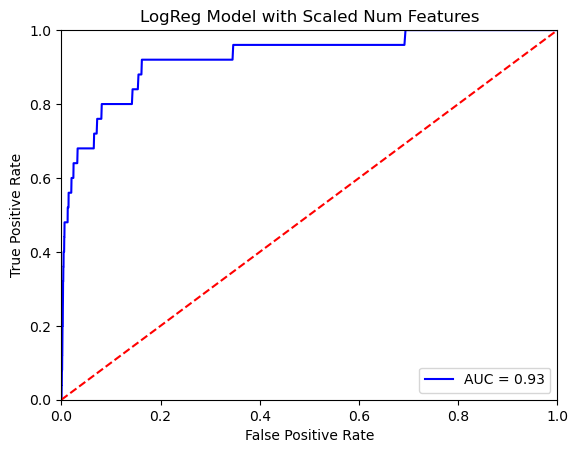

In [22]:
plot_auc_curve(lr_scaled, title='LogReg Model with Scaled Num Features')

# Logistic Regression Model (Oversampling + Scaling)

In [23]:
# Pipeline for oversampling and scaling 
sampling = RandomOverSampler(sampling_strategy="minority")
scaler = StandardScaler()
model = LogisticRegression(solver = 'liblinear', max_iter = 500)

clf = make_pipeline(sampling, scaler, model)
clf.fit(X_train, y_train.values.ravel())

# predict test values
y_pred_test = clf.predict(X_test)

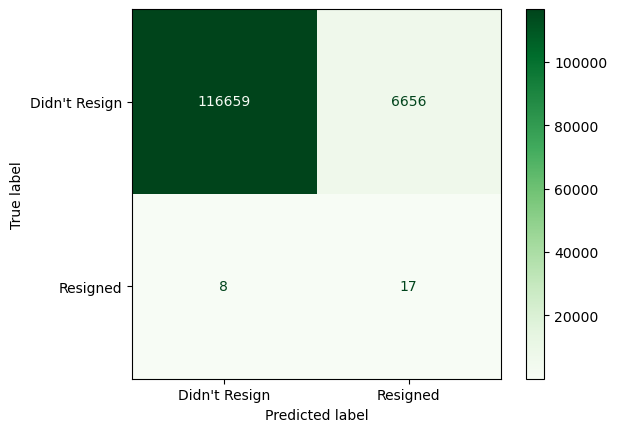

In [24]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_test, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

In [25]:
# Metrics
print(f'Accuracy Score: {accuracy_score(y_test,y_pred_test)}')
print(f'Area Under Curve: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_test)}')
print(f'Recall score: {recall_score(y_test,y_pred_test)}')

Accuracy Score: 0.9459704880817253
Area Under Curve: 0.8930323156144833
Confusion Matrix: 
[[116659   6656]
 [     8     17]]
Recall score: 0.68


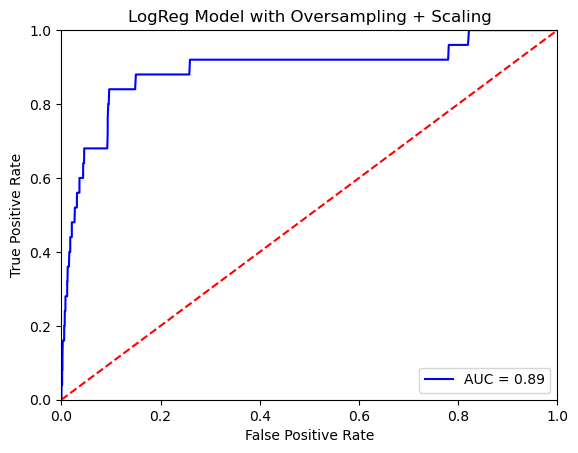

In [26]:
plot_auc_curve(clf, title="LogReg Model with Oversampling + Scaling")

### Random Forest Classifier with Oversampling

In [30]:
rf_clf = RandomForestClassifier(max_depth=3)

rf_clf.fit(X_train_over, y_train_over.values.ravel())

RandomForestClassifier(max_depth=3)

In [31]:
preds = rf_clf.predict(X_test)

In [32]:
# Get performance scores
print(f'Accuracy Score: {accuracy_score(y_test,preds)}')
print(f'Area Under Curve: {roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, preds)}')
print(f'Recall score: {recall_score(y_test,preds)}')

Accuracy Score: 0.9196124533808984
Area Under Curve: 0.8833504439849166
Confusion Matrix: 
[[113408   9907]
 [     8     17]]
Recall score: 0.68


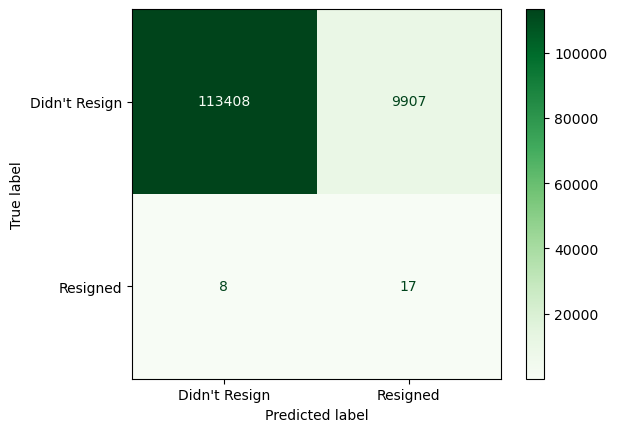

In [33]:
# Display confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=preds, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

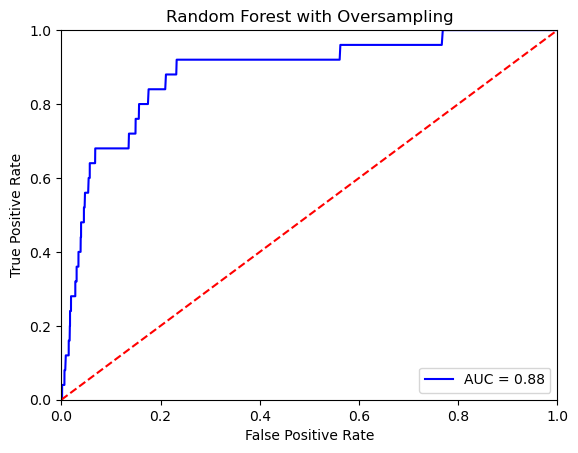

In [34]:
plot_auc_curve(rf_clf, title="Random Forest with Oversampling")

Text(0.5, 1.0, 'Random Forest Classifier Top 5 Ranked Features by Importance')

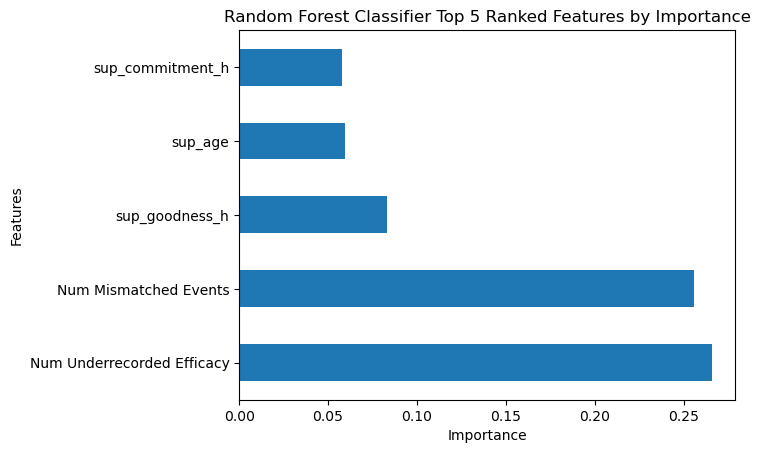

In [115]:
# plot top 5 features for Random Forest Classifier
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train_over.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest Classifier Top 5 Ranked Features by Importance")

From the Random Forest classifer, the top 3 important features (from largest to smalled) affecting classification are:
1. `Num Underrecorded Efficacy`
2. `Num Mismatched Events`
3. `Sup_goodness_h`

This is in alignment with the initial thoughts that having a high number of mismatches of Efficacy and events is a strong indicator of voluntary resignation, not to mention if your supervisor has a low goodness score.

## CatBoost Model with Oversampled Data

In [116]:
params = {
    'iterations': 50, 
    'custom_loss' : ['AUC','Accuracy'],
    'train_dir': 'crossentropy',
    'learning_rate': 0.3
}
cat_features = [0,1]
train_dataset = Pool(X_train_over, y_train_over.values.ravel(), feature_names = list(X_train_over.columns))

cb_clf = CatBoostClassifier(**params)

cb_clf.fit(train_dataset, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2633833	test: 0.1431294	best: 0.1431294 (0)	total: 47.3ms	remaining: 2.32s
1:	learn: 0.1625729	test: 0.1113506	best: 0.1113506 (1)	total: 81.3ms	remaining: 1.95s
2:	learn: 0.1120873	test: 0.0863058	best: 0.0863058 (2)	total: 113ms	remaining: 1.78s
3:	learn: 0.0881230	test: 0.0777803	best: 0.0777803 (3)	total: 147ms	remaining: 1.69s
4:	learn: 0.0750032	test: 0.0740171	best: 0.0740171 (4)	total: 179ms	remaining: 1.61s
5:	learn: 0.0670644	test: 0.0708567	best: 0.0708567 (5)	total: 211ms	remaining: 1.55s
6:	learn: 0.0553409	test: 0.0621512	best: 0.0621512 (6)	total: 245ms	remaining: 1.5s
7:	learn: 0.0523061	test: 0.0628481	best: 0.0621512 (6)	total: 280ms	remaining: 1.47s
8:	learn: 0.0491767	test: 0.0619490	best: 0.0619490 (8)	total: 315ms	remaining: 1.43s
9:	learn: 0.0453352	test: 0.0590397	best: 0.0590397 (9)	total: 347ms	remaining: 1.39s
10:	learn: 0.0436599	test: 0.0588551	best: 0.0588551 (10)	total: 380ms	remaining: 1.35s
11:	learn: 0.0429934	test: 0.0592388	best: 0.058855

In [132]:
y_pred = cb_clf.predict(X_test)

In [137]:
# get accuracy score
accuracy = accuracy_score(y_test, y_pred)

# get AUC score
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# get recall score
recall = recall_score(y_test, y_pred)

print(f"Acuracy score: {accuracy}\n AUC score: {auc}\n Recall score: {recall}")

Acuracy score: 0.9843684125182423
 AUC score: 0.8930323156144833
 Recall score: 0.0


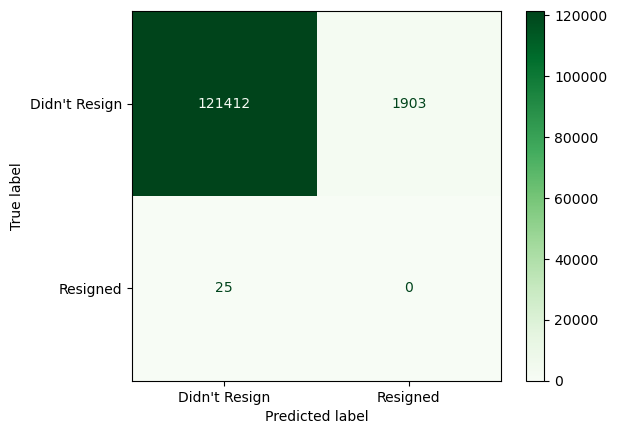

In [138]:
# show confusion matrix
display_cm = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, display_labels = ["Didn't Resign", 'Resigned'], cmap=plt.cm.Greens)
plt.show()

In [112]:
# get important features from model
cb_important_features = cb_clf.get_feature_importance(prettified=True).head(5)
cb_important_features

,Feature Id,Importances
0,Num Underrecorded Efficacy,43.566484
1,sup_goodness_h,7.753701
2,sup_commitment_h,5.909435
3,sub_health_h,4.373029
4,sup_sub_age_diff,4.343626


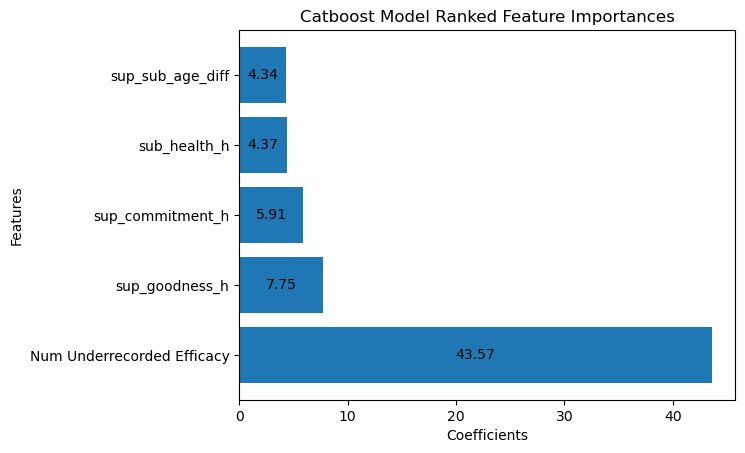

In [114]:
# plot feature importance for top 5
bar = plt.barh(width='Importances', y='Feature Id', data=cb_important_features)
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.title("Catboost Model Ranked Feature Importances")
plt.bar_label(bar, fmt='%.2f', label_type="center")
plt.show()

Similar to the Random Forest Classifier, the top 3 most important features that are strong indicators that an employee may voluntarily resign include:
1. Num Underrecorded Efficacy
2. Supervisor Goodness (hidden trait)
3. Supervisor Commitment (hidden trait) 

This again is in alignment with the initial theory that having a high number of under-recorded performance can lead to frustration felt by employees, potentially leading to them resigning.

In [43]:
## Do Final Report

In [144]:
data = {
    'Accuracy_score' : [0.95, 0.92, 0.98],
    'AUC_score': [0.90, 0.88, 0.89],
    'Recall_score': [0.68, 0.68, 0],
    'Top_feature' : ['Team 17', 'Num Underrecorded Efficacy', 'Num Underrecorded Efficacy'], 
    'Second_feature': ['Team 9', 'Num Mismatched Events', 'Supervisor Goodness'],
    'Third_feature': ['Supervisor Perceptiveness', 'Supervisor Goodness', 'Supervisor Commitment'],
    'Hyperparameters' : [['linear solver', 'max_iter: 500'], ['max_depth: 3'], ['iterations: 50, learning_rate: 0.3', 'train_dir: crossentropy']]
}
final_results = pd.DataFrame(index=['LogReg', 'RandomForest', 'Catboost'], data=data )
final_results

,Accuracy_score,AUC_score,Recall_score,Top_feature,Second_feature,Third_feature,Hyperparameters
LogReg,0.95,0.90,0.68,Team 17,Team 9,Supervisor Perceptiveness,"[linear solver, max_iter: 500]"
RandomForest,0.92,0.88,0.68,Num Underrecorded Efficacy,Num Mismatched Events,Supervisor Goodness,[max_depth: 3]
Catboost,0.98,0.89,0.00,Num Underrecorded Efficacy,Supervisor Goodness,Supervisor Commitment,"[iterations: 50, learning_rate: 0.3, train_dir..."


In [145]:
final_results.to_csv('../reports/metric_file.csv')

## Conclusion

Of the three models, the one with the highest AUC score and recall score was the Logistic Regression model with oversampled data. From this model, the strongest indicator that an employee may resign would be if that employee is on Team 17, followed by being on Team 9 and lastly having a supervisor with a low Perceptiveness score.

